In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("D:\\feature_selection\\train_u6lujuX_CVtuZ9i.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df = df[['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']]
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [7]:
df.isnull().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
Loan_Status        0
dtype: int64

In [11]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df['Gender'].mode()[0]

'Male'

In [15]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df.head()

C:\Users\abuba\AppData\Local\Temp\ipykernel_8956\197921793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [17]:
df.isnull().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [25]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1


In [31]:
from sklearn.feature_selection import chi2 

x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [35]:
chi_scores = chi2(x,y)
chi_scores

(array([3.62343084e-02, 1.78242499e+00, 8.59527587e-02, 3.54050246e+00,
        7.28480330e-03, 2.60058772e+01, 3.77837464e-01]),
 array([8.49032435e-01, 1.81851834e-01, 7.69386856e-01, 5.98873168e-02,
        9.31982300e-01, 3.40379591e-07, 5.38762867e-01]))

In [43]:
chi_values = pd.DataFrame(chi_scores[0],index=x.columns,columns=['Score'])
chi_values

,Score
Gender,0.036234
Married,1.782425
Dependents,0.085953
Education,3.540502
Self_Employed,0.007285
Credit_History,26.005877
Property_Area,0.377837


In [45]:
chi_values = chi_values.sort_values(by='Score', ascending=False, inplace=False)
chi_values

,Score
Credit_History,26.005877
Education,3.540502
Married,1.782425
Property_Area,0.377837
Dependents,0.085953
Gender,0.036234
Self_Employed,0.007285


<Axes: >

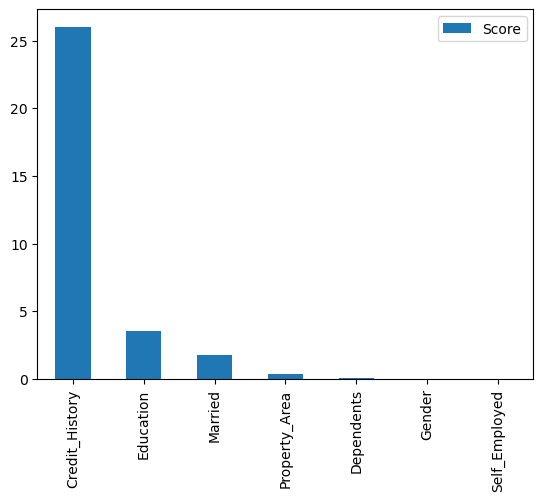

In [47]:
chi_values.plot.bar()

In [49]:
p_values = pd.DataFrame(data=chi_scores[1], index=x.columns, columns=['PValues'])
p_values

,PValues
Gender,8.490324e-01
Married,1.818518e-01
Dependents,7.693869e-01
Education,5.988732e-02
Self_Employed,9.319823e-01
Credit_History,3.403796e-07
Property_Area,5.387629e-01


In [51]:
p_values = p_values.sort_values(by='PValues', ascending=True, inplace=False)
p_values

,PValues
Credit_History,3.403796e-07
Education,5.988732e-02
Married,1.818518e-01
Property_Area,5.387629e-01
Dependents,7.693869e-01
Gender,8.490324e-01
Self_Employed,9.319823e-01


<Axes: >

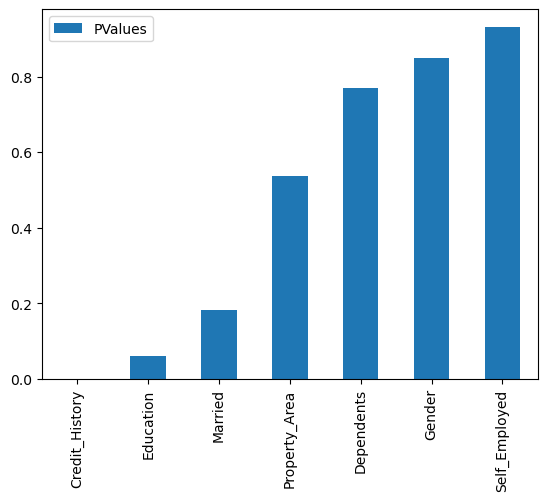

In [53]:
p_values.plot.bar()